<a href="https://colab.research.google.com/github/AbdallaElbedwihi/Loan-default----oversampling/blob/main/Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan defaulting prediction -- Python practice





In [ ]:
# Upload data set
import pandas as pd
loans = pd.read_csv('/content/drive/MyDrive/Data/lending_club_loans (2007-2011 ABAV assignment).csv')


In [ ]:
# Explore first 5 rows of data
loans.head()


,id,member_id,loan_amnt,funded_amnt,Profit / Loss,loan_status,int_rate,term,installment,Grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int
0,1077501,1296599,5000,5000,Profit,Fully Paid,0.1065,36 months,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0,1/1/1985,737,1,3,0,13648,0.837,9,5863.155187,5000.00,863.16
1,1077430,1314167,2500,2500,Loss,Charged Off,0.1527,60 months,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0,1/4/1999,742,5,3,0,1687,0.094,4,1008.710000,456.46,435.17
2,1077175,1313524,2400,2400,Profit,Fully Paid,0.1596,36 months,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0,1/11/2001,737,2,2,0,2956,0.985,10,3005.666844,2400.00,605.67
3,1076863,1277178,10000,10000,Profit,Fully Paid,0.1349,36 months,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,CA,20.00,0,1/2/1996,692,1,10,0,5598,0.210,37,12231.890000,10000.00,2214.92
4,1075358,1311748,3000,3000,Current,Current,0.1269,60 months,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,OR,17.94,0,1/1/1996,697,0,15,0,27783,0.539,38,3784.490000,2729.22,1055.27


In [ ]:
# Information about variables and shape of dataset
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39786 non-null  int64  
 1   member_id            39786 non-null  int64  
 2   loan_amnt            39786 non-null  int64  
 3   funded_amnt          39786 non-null  int64  
 4   Profit / Loss        39786 non-null  object 
 5   loan_status          39786 non-null  object 
 6   int_rate             39786 non-null  float64
 7   term                 39786 non-null  object 
 8   installment          39786 non-null  float64
 9   Grade                39786 non-null  object 
 10  sub_grade            39786 non-null  object 
 11  emp_length           38708 non-null  object 
 12  home_ownership       39786 non-null  object 
 13  annual_inc           39786 non-null  float64
 14  verification_status  39786 non-null  object 
 15  issue_d              39786 non-null 

Dataset size of around 40,000 observations and 32 variables. 
Interesting variables to look at for loan default prediction = loan_status or Proft/Loss

In [ ]:
# Statistical deescription of continuous variables
loans.describe()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int
count,3.978600e+04,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39736.000000,39786.000000,39786.000000,39786.000000,39786.000000
mean,6.833939e+05,8.507937e+05,11231.360277,10958.722289,0.120279,324.733637,6.897907e+04,13.317794,0.146534,716.997989,0.869049,9.294023,0.055145,13391.983914,0.488581,22.090308,12216.555531,9843.236370,2275.876011
std,2.106770e+05,2.656370e+05,7464.542832,7194.076908,0.037275,208.923212,6.376263e+04,6.678300,0.491826,35.840682,1.070069,4.399997,0.237653,15894.635107,0.283366,11.401620,9139.086280,7124.237548,2631.037038
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,627.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5.163518e+05,6.670548e+05,5500.000000,5400.000000,0.092500,167.080000,4.050000e+04,8.180000,0.000000,687.000000,0.000000,6.000000,0.000000,3704.250000,0.254000,13.000000,5582.367998,4615.775000,663.045000
50%,6.662295e+05,8.515440e+05,10000.000000,9650.000000,0.118600,280.610000,5.900000e+04,13.410000,0.000000,712.000000,1.000000,9.000000,0.000000,8859.500000,0.493000,20.000000,9930.859961,8000.000000,1352.805000
75%,8.378710e+05,1.047528e+06,15000.000000,15000.000000,0.145900,430.780000,8.234250e+04,18.600000,0.000000,742.000000,1.000000,12.000000,0.000000,17065.000000,0.724000,29.000000,16610.569445,13900.000000,2845.025000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,827.000000,8.000000,44.000000,4.000000,149588.000000,0.999000,90.000000,58563.679930,35000.020000,23823.750000


In [ ]:
# Analyze count for loan_status and profit/loss
loans["loan_status"].value_counts()               # This shows the count for non-missing values

Fully Paid            33586
Charged Off            5653
Current                 513
In Grace Period          16
Late (31-120 days)       12
Late (16-30 days)         5
Default                   1
Name: loan_status, dtype: int64

Majority of loans were fully paid. Only around 15% of loans were charged off or not fully paid

In [ ]:
# If we were to want to see the percentage / proportion of each class
round(loans["loan_status"].value_counts(normalize = True) * 100, 2)               # Found proportion as a percentage rather than count rounded upto 2 decimal places


Fully Paid            84.42
Charged Off           14.21
Current                1.29
In Grace Period        0.04
Late (31-120 days)     0.03
Late (16-30 days)      0.01
Default                0.00
Name: loan_status, dtype: float64

In [ ]:
# Remove Profit / Loss variable and regenerate it based on dataset because i had previously made this variable on excel and seems to be wrong...
import pandas as pd

loans = loans.drop(columns = ['Profit / Loss'])

In [ ]:
# Since focus of analysis will be on completed loans, remove current loans from dataset
# To select loans that are still current use following syntax::
import pandas as pd

loans_Completed = loans.loc[loans['loan_status'] != 'Current']



In [ ]:
# Generate the column again by subtracting (total_pymnt) from (funded_amnt)
loans_Completed['DiffPaid_Expected'] = loans_Completed['total_pymnt'] - loans_Completed['funded_amnt'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Check the structure of newly created data
loans_Completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39273 entries, 0 to 39785
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39273 non-null  int64  
 1   member_id            39273 non-null  int64  
 2   loan_amnt            39273 non-null  int64  
 3   funded_amnt          39273 non-null  int64  
 4   loan_status          39273 non-null  object 
 5   int_rate             39273 non-null  float64
 6   term                 39273 non-null  object 
 7   installment          39273 non-null  float64
 8   Grade                39273 non-null  object 
 9   sub_grade            39273 non-null  object 
 10  emp_length           38214 non-null  object 
 11  home_ownership       39273 non-null  object 
 12  annual_inc           39273 non-null  float64
 13  verification_status  39273 non-null  object 
 14  issue_d              39273 non-null  object 
 15  pymnt_plan           39273 non-null 

In [ ]:
# Using the newly generated variable, create another variable (Profit/Loss) to identify profit or loss. Values greater than 0 are profit, less than 0 is loss

import numpy as np

loans_Completed['Profit/Loss'] = np.nan       # This allows for the adding of new variables that are initially ffilled with NA values 

loans_Completed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,member_id,loan_amnt,funded_amnt,loan_status,int_rate,term,installment,Grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,DiffPaid_Expected,Profit/Loss
0,1077501,1296599,5000,5000,Fully Paid,0.1065,36 months,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0,1/1/1985,737,1,3,0,13648,0.837,9,5863.155187,5000.00,863.16,863.155187,NaN
1,1077430,1314167,2500,2500,Charged Off,0.1527,60 months,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0,1/4/1999,742,5,3,0,1687,0.094,4,1008.710000,456.46,435.17,-1491.290000,NaN
2,1077175,1313524,2400,2400,Fully Paid,0.1596,36 months,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0,1/11/2001,737,2,2,0,2956,0.985,10,3005.666844,2400.00,605.67,605.666844,NaN
3,1076863,1277178,10000,10000,Fully Paid,0.1349,36 months,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,CA,20.00,0,1/2/1996,692,1,10,0,5598,0.210,37,12231.890000,10000.00,2214.92,2231.890000,NaN
5,1075269,1311441,5000,5000,Fully Paid,0.0790,36 months,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,n,wedding,AZ,11.20,0,1/11/2004,732,3,9,0,7963,0.283,12,5632.210000,5000.00,632.21,632.210000,NaN


In [ ]:
# Add values into variable based on whether the loan ended in profit / loss

# Using numpy select ffunction

conditions = [loans_Completed['DiffPaid_Expected'] > 0]           # Using this, you can identify multiple different conditions and outputs
outputs = ['Profit']

temp = np.select(conditions, outputs, 'Loss')                     # Then insert all conditions and outputs here, followed by the result when all the conditions don't apply and voila.
pd.Series(temp)


loans_Completed['Profit/Loss'] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Examine newly create

In [ ]:
# Check proportions again to check if current loans have been removed
round(loans_Completed["Profit/Loss"].value_counts(normalize = True), 2)

Profit    0.88
Loss      0.12
Name: Profit/Loss, dtype: float64

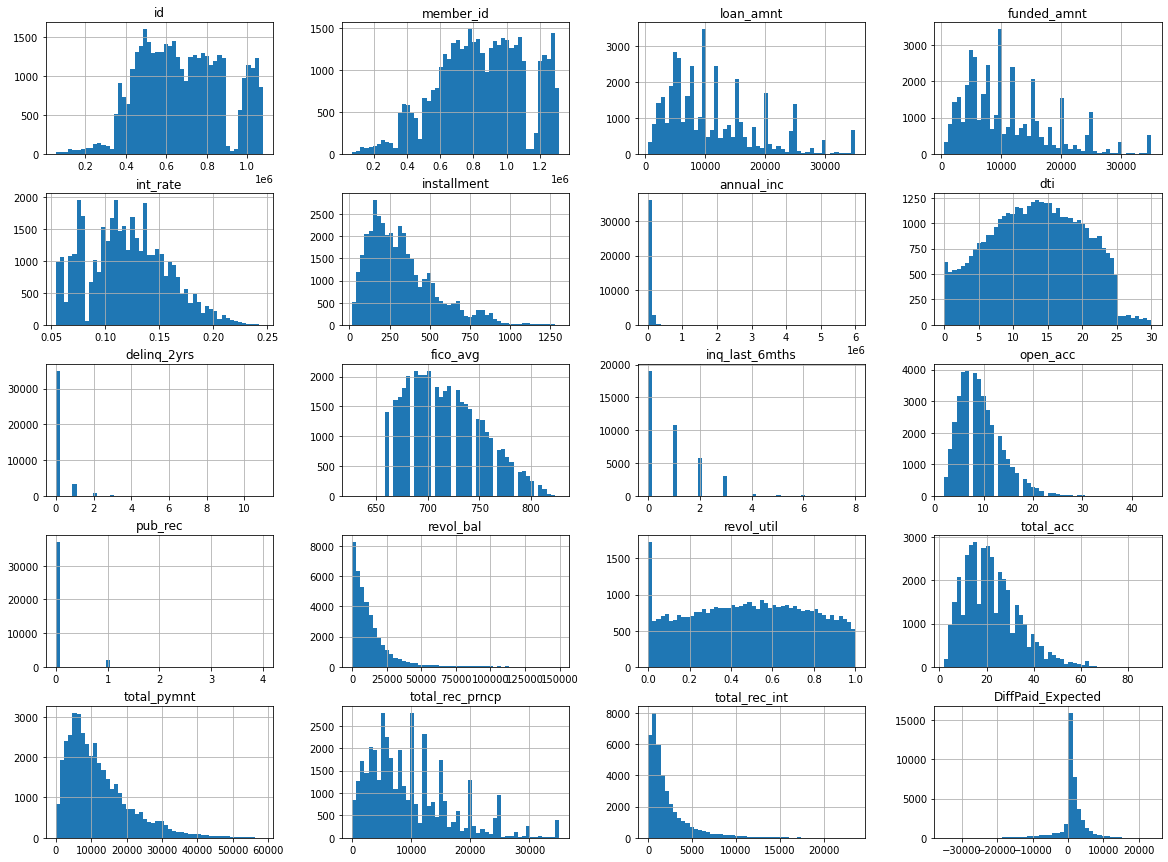

In [ ]:
# Explore continuous data using histrogram
import matplotlib.pyplot as plt
loans_Completed.hist(bins=50, figsize = (20,15))
plt.show()

From these results, two id variabels need to be removed. These are id and member_id... 

delinq_2yrs, inq_last_6mths, pub_rec are factors rather than continuous variables and should be represented as factors based on their dictionary or description of the variables. 

Open_acc and Total_acc can be considered discrete in a way, but due to the large range, it is better to maintain it as continuous.


Also, looking at dti variable, we observe that a large group of individuals seem to have a dti ratio of '0'


In [ ]:
# Convert mentioned variabels to categorical (Object)

loans_Completed['delinq_2yrs'] = loans_Completed['delinq_2yrs'].astype('object') 
loans_Completed['inq_last_6mths'] = loans_Completed['inq_last_6mths'].astype('object') 
loans_Completed['pub_rec'] = loans_Completed['pub_rec'].astype('object') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Remove id variables
loans_Completed = loans_Completed.drop(columns = ['id', 'member_id'])

loans_Completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39273 entries, 0 to 39785
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39273 non-null  int64  
 1   funded_amnt          39273 non-null  int64  
 2   loan_status          39273 non-null  object 
 3   int_rate             39273 non-null  float64
 4   term                 39273 non-null  object 
 5   installment          39273 non-null  float64
 6   Grade                39273 non-null  object 
 7   sub_grade            39273 non-null  object 
 8   emp_length           38214 non-null  object 
 9   home_ownership       39273 non-null  object 
 10  annual_inc           39273 non-null  float64
 11  verification_status  39273 non-null  object 
 12  issue_d              39273 non-null  object 
 13  pymnt_plan           39273 non-null  object 
 14  purpose              39273 non-null  object 
 15  addr_state           39273 non-null 

8 float variables, 6 integers and 16 object.

In [ ]:
# Check for missing values

print(loans_Completed.isnull().sum())



loan_amnt                 0
funded_amnt               0
loan_status               0
int_rate                  0
term                      0
installment               0
Grade                     0
sub_grade                 0
emp_length             1059
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
pymnt_plan                0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
fico_avg                  0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_rec_prncp           0
total_rec_int             0
DiffPaid_Expected         0
Profit/Loss               0
dtype: int64


In [ ]:
# Since we observe that emp_length variable has 1074 missing values, we can consider this individuals unemployed. So replace these missing values with Unemployed

loans_Completed['emp_length'] = loans_Completed['emp_length'].fillna(value = 'Unemployed', method=None, axis=None, inplace=False)           # value: value to use to replace NaN
                                                                                                                                            # method: method to use for replacing NaN. method='ffill' does the forward replacement. method='bfill' does the backword replacement.
                                                                                                                                            # axis: 0 for row and 1 for column.
                                                                                                                                            # inplace: If True, do operation inplace and return None.


# Remove missing values in 'revol_util' since it is only 46 observations
loans_Completed = loans_Completed.dropna(subset = ['revol_util'])                                                                                                                                            

In [ ]:
# Check for missing values again
print(loans_Completed.isnull().sum())

loan_amnt              0
funded_amnt            0
loan_status            0
int_rate               0
term                   0
installment            0
Grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
fico_avg               0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_rec_prncp        0
total_rec_int          0
DiffPaid_Expected      0
Profit/Loss            0
dtype: int64


All missing values in this case have been treated

In [ ]:
# Create a new dataset only for categorical variables

loans_Cat = loans_Completed.select_dtypes(include=['object'])


In [ ]:
# Use this new dataset to vizualize the categorical data, but first remove data variables or variables not expected to be used
loans_Cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   loan_status          39223 non-null  object
 1   term                 39223 non-null  object
 2   Grade                39223 non-null  object
 3   sub_grade            39223 non-null  object
 4   emp_length           39223 non-null  object
 5   home_ownership       39223 non-null  object
 6   verification_status  39223 non-null  object
 7   issue_d              39223 non-null  object
 8   pymnt_plan           39223 non-null  object
 9   purpose              39223 non-null  object
 10  addr_state           39223 non-null  object
 11  delinq_2yrs          39223 non-null  object
 12  earliest_cr_line     39223 non-null  object
 13  inq_last_6mths       39223 non-null  object
 14  pub_rec              39223 non-null  object
 15  Profit/Loss          39223 non-null  object
dtypes: o

issue_d is not necessary for current analysis of variables, 
earliest_cr_line is also unecessary
So these can be remove from subset first

In [ ]:
# Drop issue_d variable
loans_Completed = loans_Completed.drop(columns = ['issue_d', 'earliest_cr_line'])

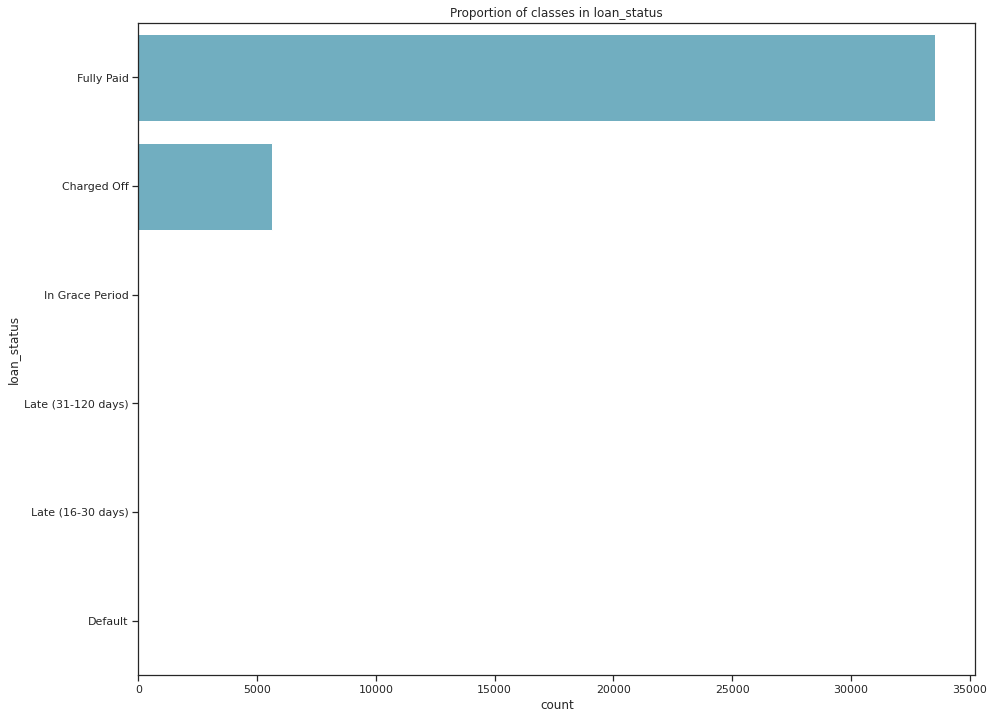

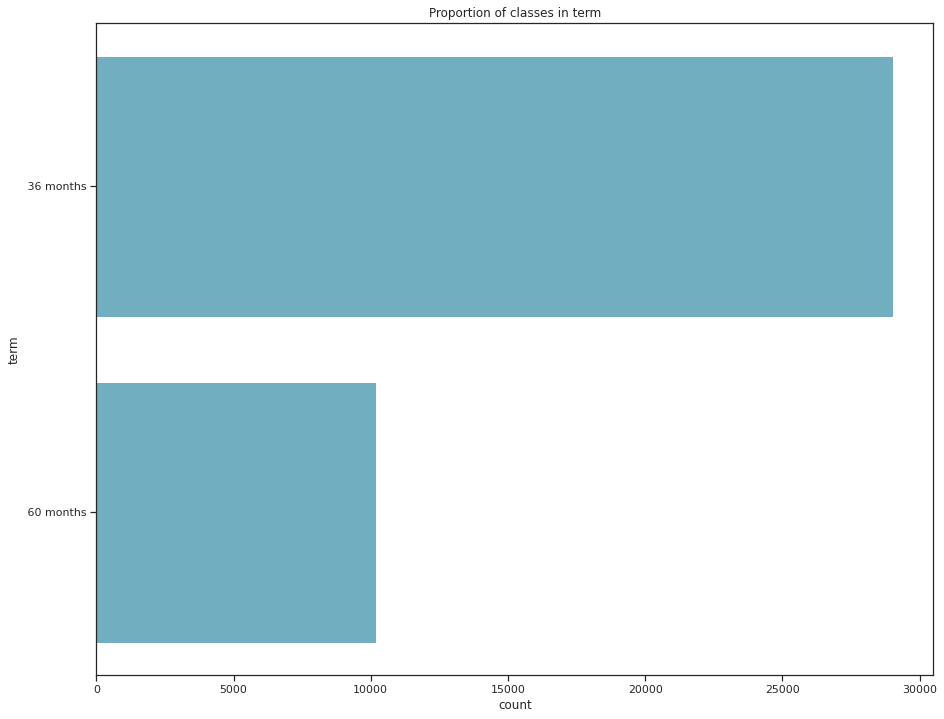

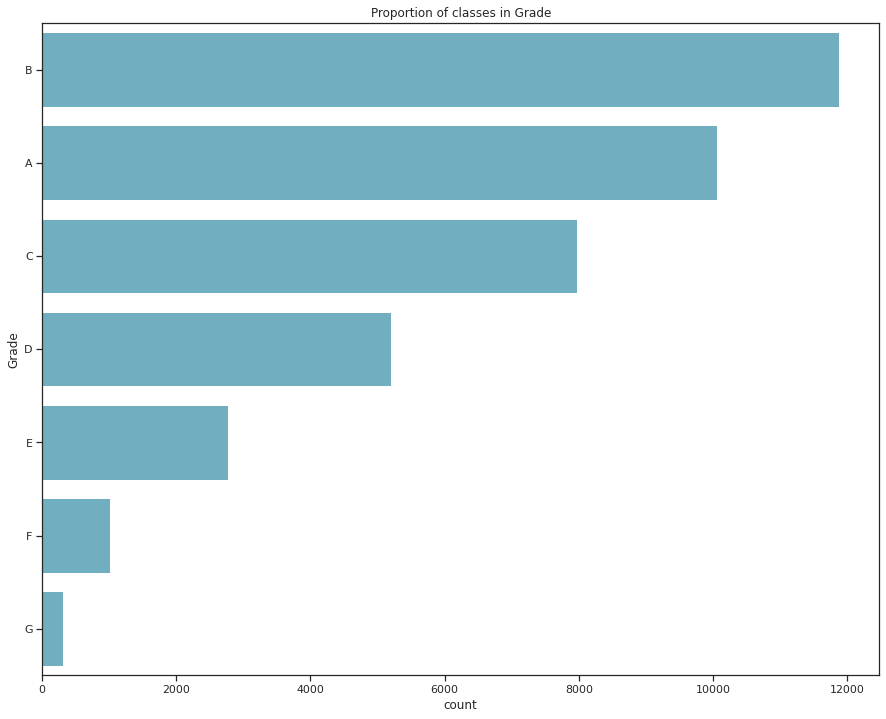

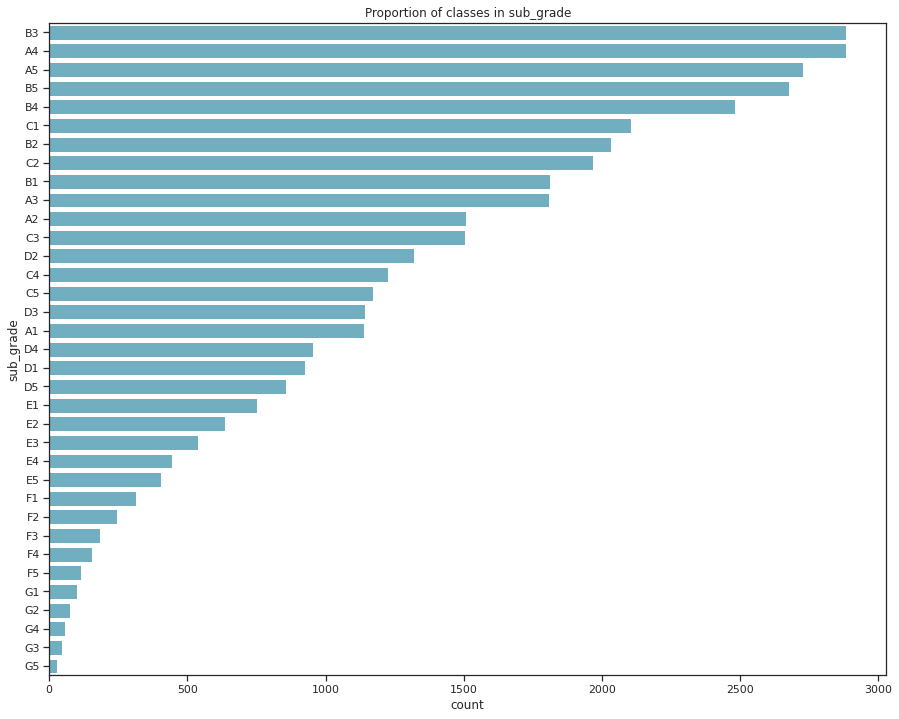

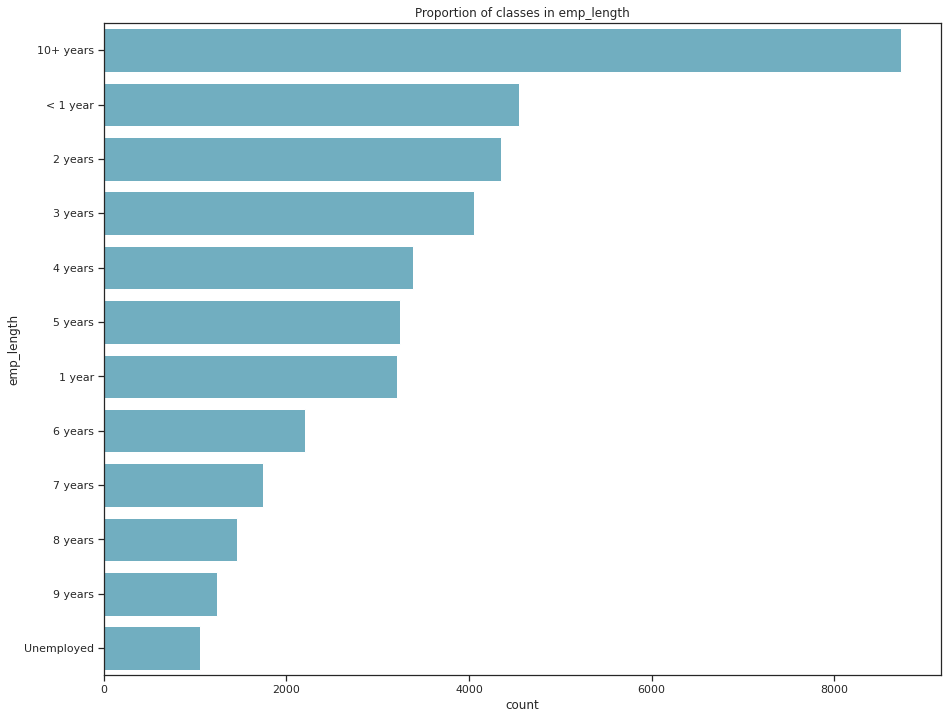

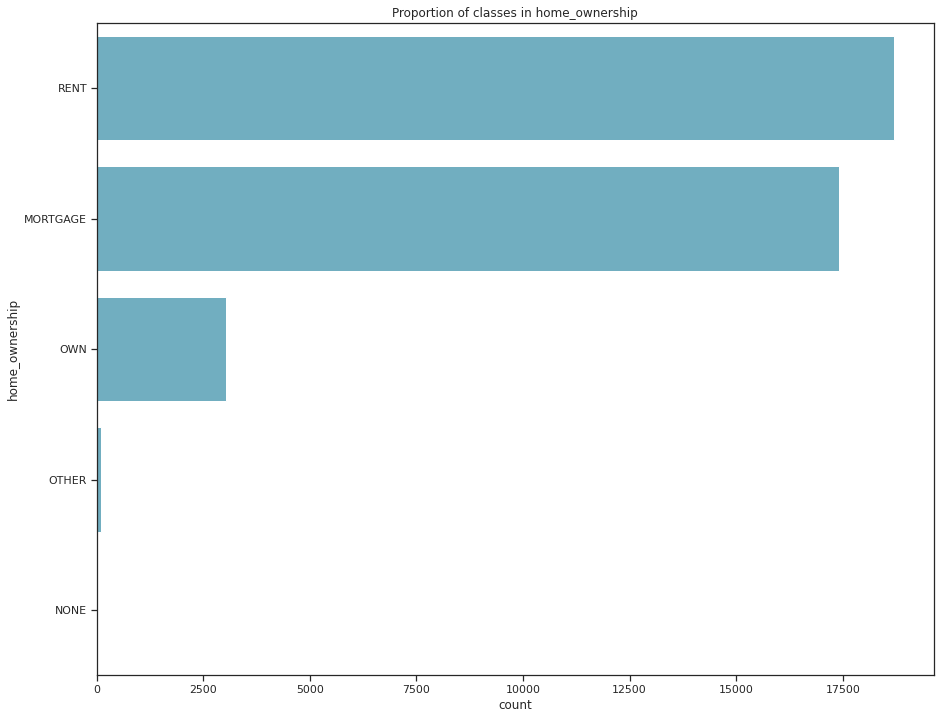

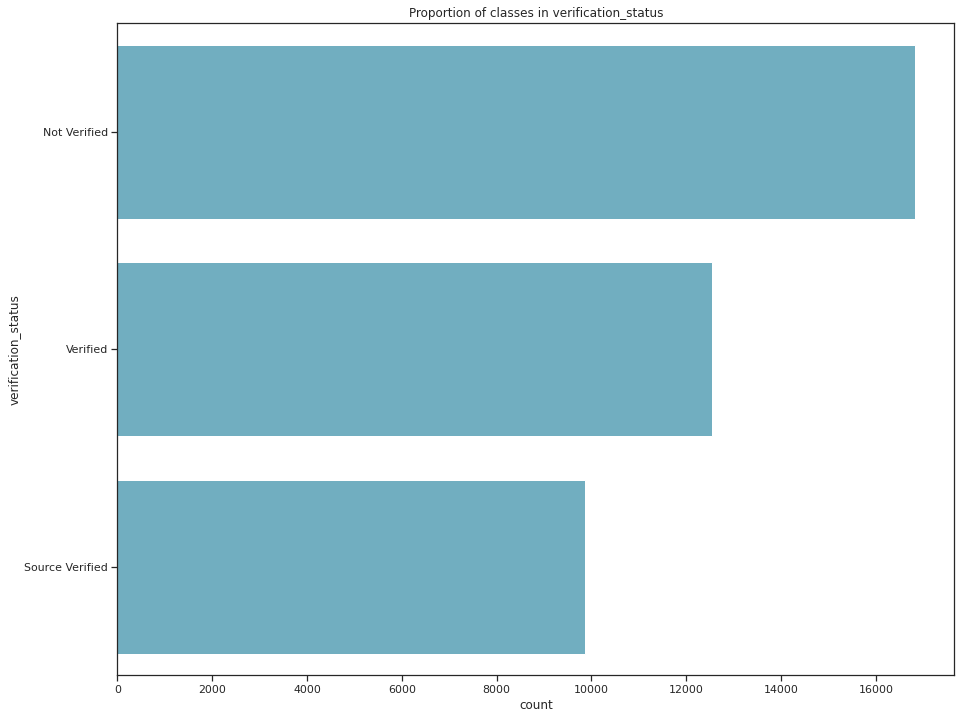

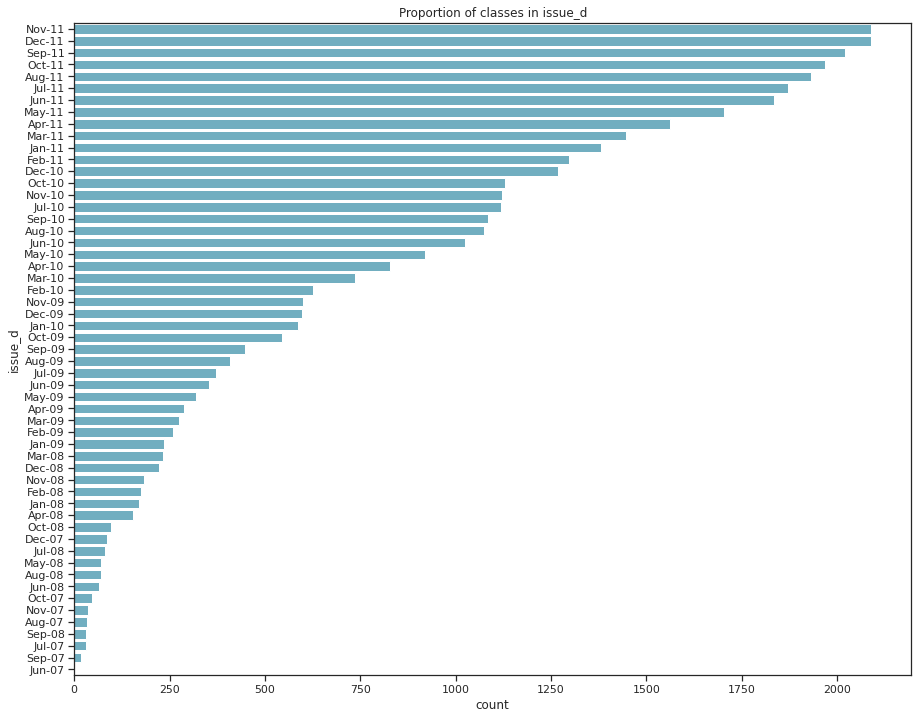

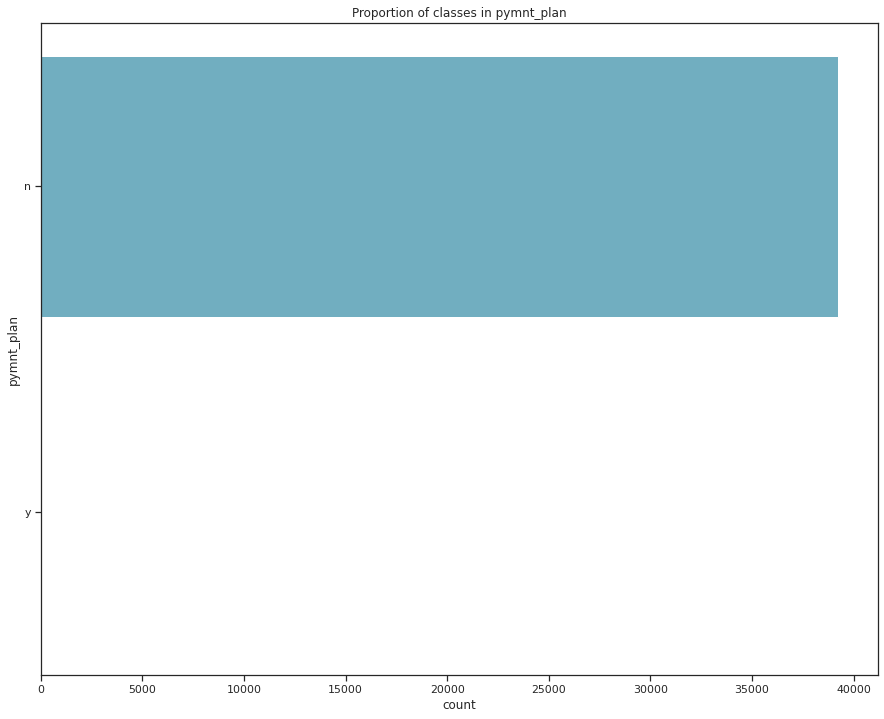

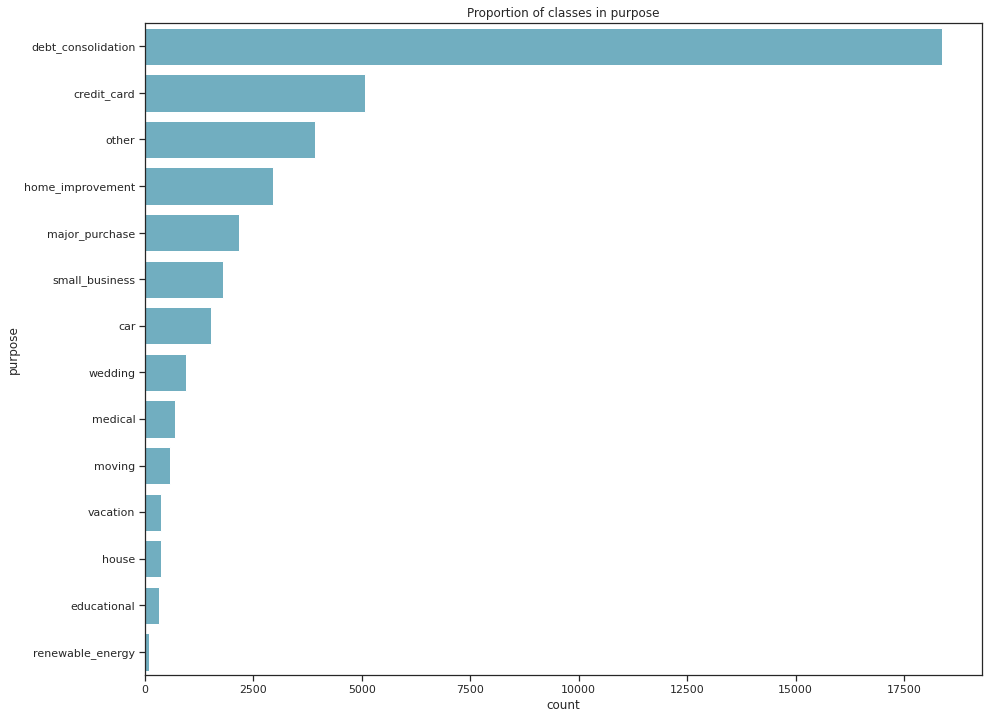

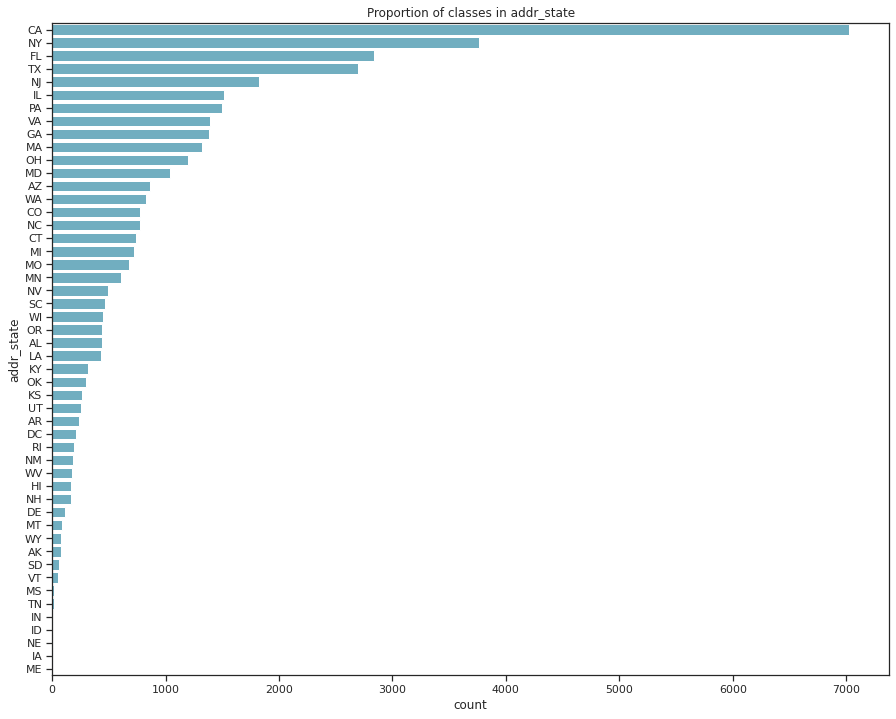

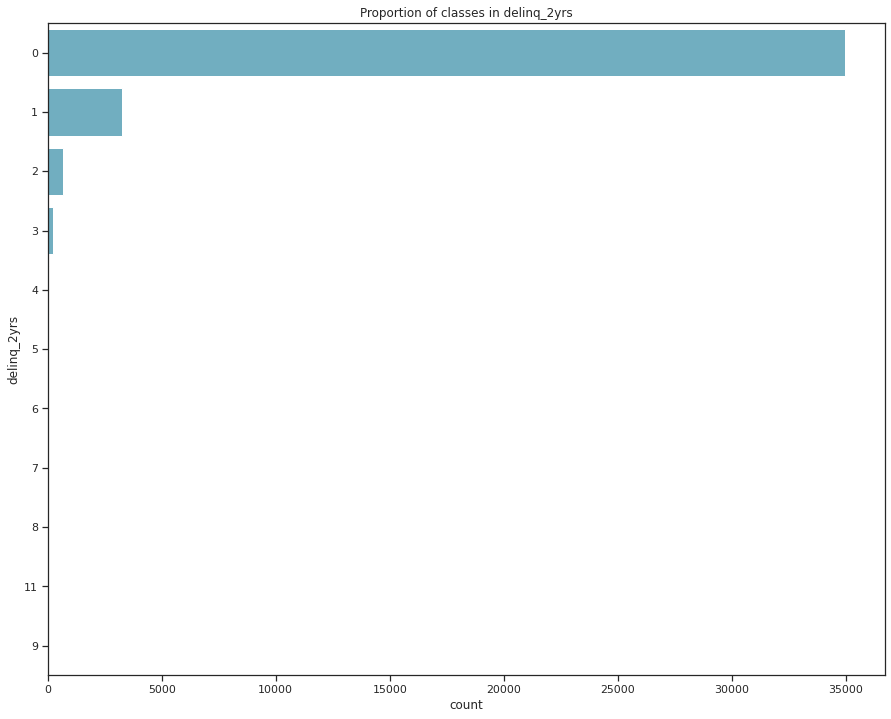

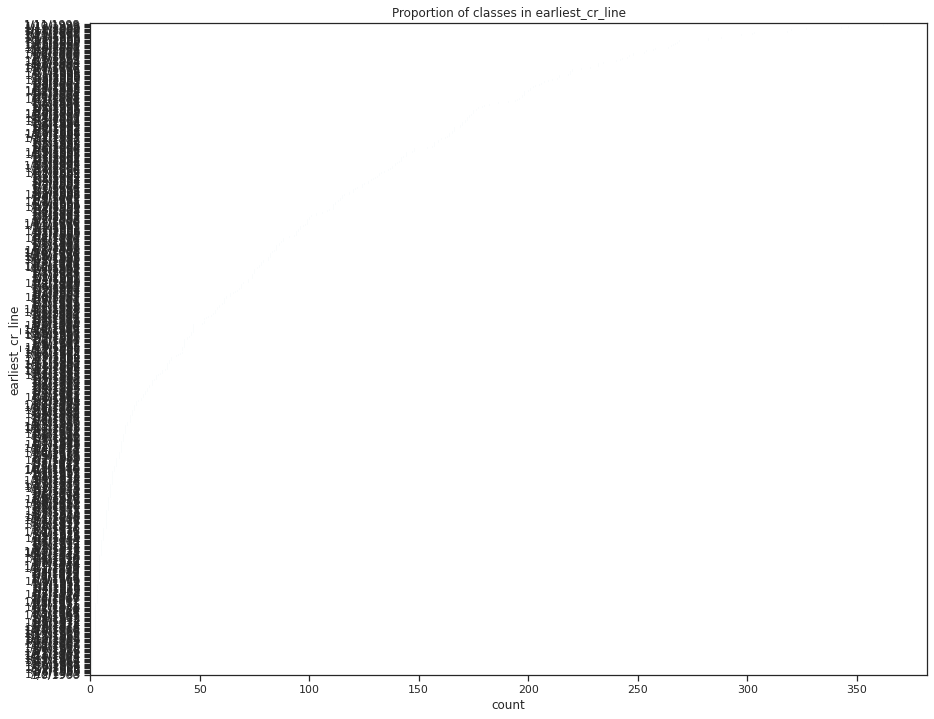

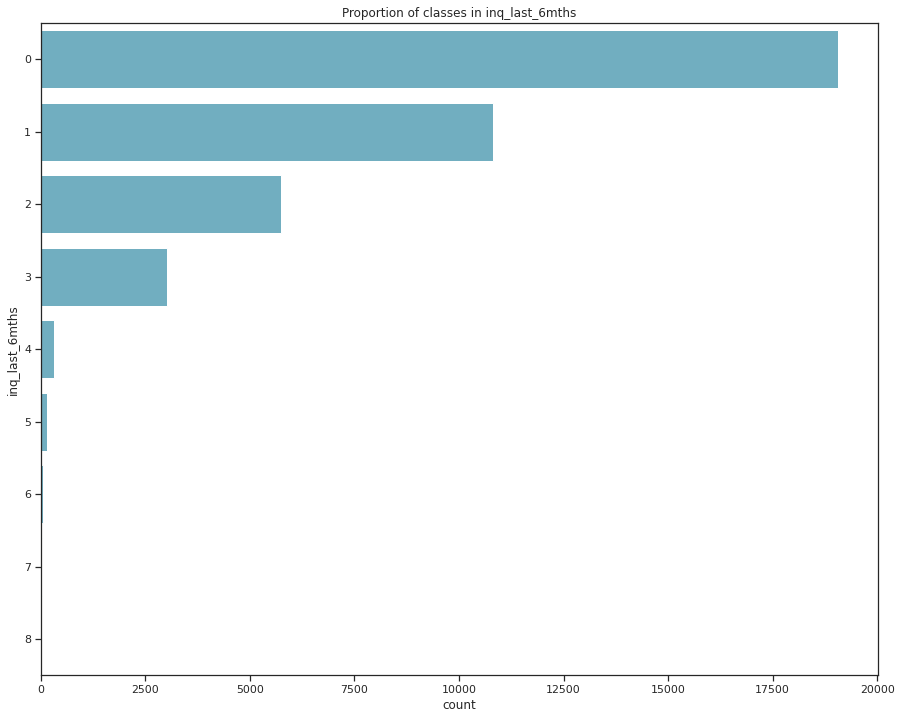

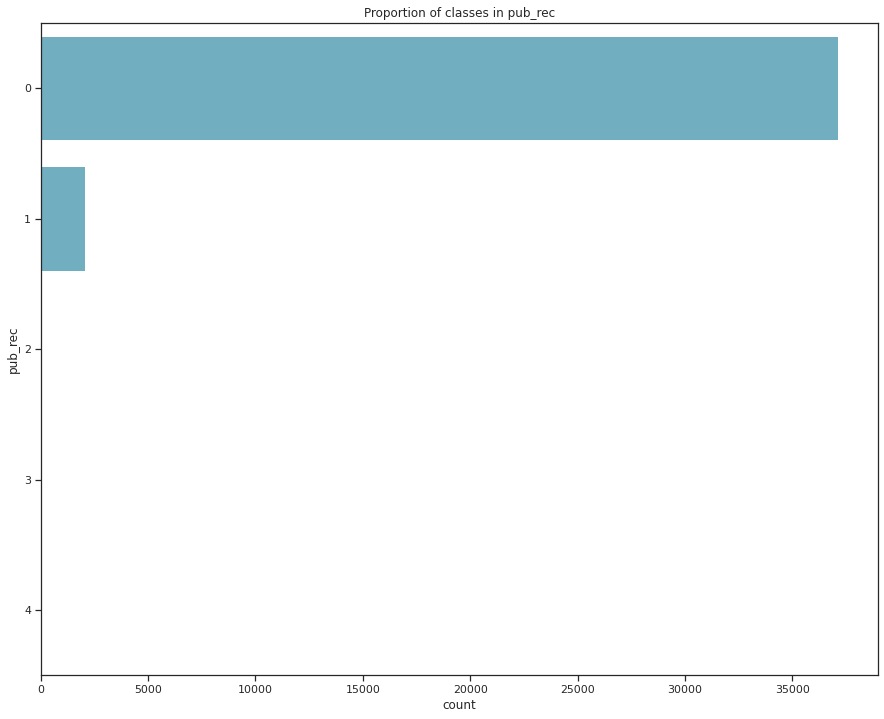

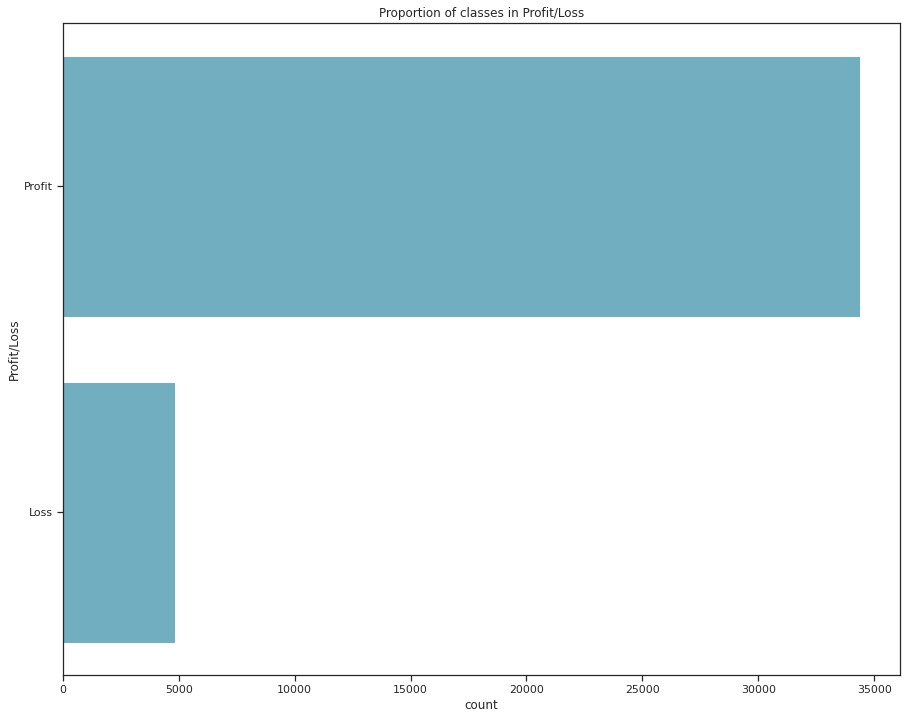

In [ ]:
# Visualize the different cateogrical variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)          # Set the theme for the plot               


def cat_function(y):                                    # Create a function to visualize categorical variables using a FOR loop
    n = y.shape[1]                                      # Define number of columns as the number of times the loop works
    for i in range(0,n):
        column_name = y.columns[i]                      # Retrieve column name to be used for plot labels
        plt.figure(figsize=(15, 12))                    # Define figure size of plots
        sns.countplot(y = column_name, 
                      data = y,
                      color = "c",
                      order = y[column_name].value_counts().index).set_title("Proportion of classes in {}".format(column_name))  # Order here allows for the grouping of classes in the plots in descending order
                                                                                                                                 # Set_title sets the title of a plot. {} represents an empty space to be replaced with whatever value is identified in "format()" afterwards.


cat_function(loans_Cat)



Loan status, majority of loans are either paid off or charged off

Grade and sub-grade are similar variables to each other and are possibly related to int_rate based on data dictionary. Since grades are given based on int-rate. Might want to consider removing them from analysis or maintaining one variable.

emp_length too many classes
Pymnt_plan is a useless variable. Check for proportion

Purpose has too many classes

addr_state too many classes

delinq_2yrs -- majority of indiviudals had 0 or 1 delinwuencies

inq_last_6mths -- majority of inquiries 0,1,2,3 beyond that too little

Pub-rec -- Majority 0,1

Profit/Loss - Most loans ended in a profit, focus should be on loans that ended 
in loss


In [ ]:
# Alternate method for data cleaning or removal / replacement of missing values

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = "median")        In this case we are creating an instance that will replace each variable's missing value using it's median value, however since median imputation only works on  numerical data, remove all other data and keep the numerical data.
# loans_num = loans.drop("variables_cat", axis = 1)


# After this, we can fit the created imputer instance to the training data which will then evaluate the median value of all variables

# To find the values that were calculated as mean for each variable:::
# imputer.statistics_                               

# Then, to apply this onto the different variables and replace all missing values with median

# X = imputer.transform(loans_num)


# The values returned as X is a simple NumPy array containing the transformed data... So, to convert back to dataframe



# Hands-On machine learning with Scikit-Learn, keras and tensorflow Page 63, 64



In [ ]:
# Reduce the number of classes in each variable

# First, start with Purpose

round(loans_Completed["purpose"].value_counts(normalize = True) * 100, 2)  


debt_consolidation    46.86
credit_card           12.94
other                 10.01
home_improvement       7.52
major_purchase         5.55
small_business         4.58
car                    3.91
wedding                2.40
medical                1.75
moving                 1.48
vacation               0.96
house                  0.95
educational            0.82
renewable_energy       0.26
Name: purpose, dtype: float64

In [ ]:
# To replace values in the purpose variable, create a dictionary of the labels and their replacement

replace_purpose = {'purpose': {'renewable_energy': 'other', 'home_improvement': 'personal', 'car' : 'personal', 'wedding': 'personal',
                                  'medical': 'personal', 'moving': 'personal', 'vacation': 'personal' , 'house': 'personal' , 'educational': 'personal',}}


# Now use that to replace labels in the variable

loans_Completed1 = loans_Completed.copy()
loans_Completed1.replace(replace_purpose, inplace = True)

# Recheck for percentage of categories
round(loans_Completed1["purpose"].value_counts(normalize = True) * 100, 2) 

debt_consolidation    46.86
personal              19.79
credit_card           12.94
other                 10.27
major_purchase         5.55
small_business         4.58
Name: purpose, dtype: float64

In [ ]:
# NExt, delinq_2yrs and inq_last_6mths

# Recheck for percentage of categories
print(round(loans_Completed1[["delinq_2yrs"]].value_counts(normalize = True) * 100, 2) )
print("\n")
print(round(loans_Completed1["inq_last_6mths"].value_counts(normalize = True) * 100, 2) )
print("\n")
round(loans_Completed1["pub_rec"].value_counts(normalize = True) * 100, 2)


delinq_2yrs
0              89.12
1               8.33
2               1.73
3               0.56
4               0.15
5               0.05
6               0.03
7               0.01
8               0.01
11              0.00
9               0.00
dtype: float64


0    48.59
1    27.56
2    14.66
3     7.71
4     0.82
5     0.37
6     0.16
7     0.09
8     0.04
Name: inq_last_6mths, dtype: float64




0    94.64
1     5.21
2     0.12
3     0.02
4     0.01
Name: pub_rec, dtype: float64

In [ ]:
# Now perfrom same process done for "purpose" variable
replace_delinq_2yrs = {"delinq_2yrs": {3: '3+', 4: '3+', 5 : '3+', 6 : '3+',
                                  7 :'3+', 8: '3+', 9 : '3+' , 11 : '3+'}}

replace_inq_last_6mths = {"inq_last_6mths": {4: '4+', 5 : '4+', 6 : '4+', 7 : '4+',
                                  8 : '4+'}}

replace_pub_rec = {"pub_rec": {2: '2+', 3 : '2+', 4 : '2+'}}



In [ ]:
# Replace terms in new dataset

loans_Completed2  = loans_Completed1.copy()                                     # copy() here ensures original dataset is not altered

# Replace all variables in one go

loans_Completed2.replace(replace_delinq_2yrs, inplace = True)
loans_Completed2.replace(replace_inq_last_6mths, inplace = True)
loans_Completed2.replace(replace_pub_rec, inplace = True)

In [ ]:
# CHeck for proportion of classes in variables

print(round(loans_Completed2[["delinq_2yrs"]].value_counts(normalize = True) * 100, 2) )
print("\n")
print(round(loans_Completed2["inq_last_6mths"].value_counts(normalize = True) * 100, 2) )
print("\n")
round(loans_Completed2["pub_rec"].value_counts(normalize = True) * 100, 2)
 


delinq_2yrs
0              89.12
1               8.33
2               1.73
3+              0.81
dtype: float64


0     48.59
1     27.56
2     14.66
3      7.71
4+     1.48
Name: inq_last_6mths, dtype: float64




0     94.64
1      5.21
2+     0.15
Name: pub_rec, dtype: float64

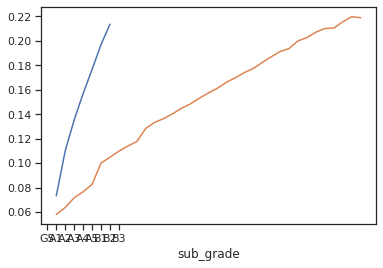

In [ ]:
# Plot interest rate against GRADE AND SUB-GRADE

loans_avg_intrate = loans_Completed2.groupby(['Grade']).mean()['int_rate']

# To do so, first evaluate the average interest rate for each grade and then plot on a line  graph as follows

loans_avg_intrate.plot()


# Similarly, do the same for  "Sub-Grade"
loans_avg_intrateSG = loans_Completed2.groupby(['sub_grade']).mean()['int_rate']
loans_avg_intrateSG.plot()


Results are not that great in terms of vizualization

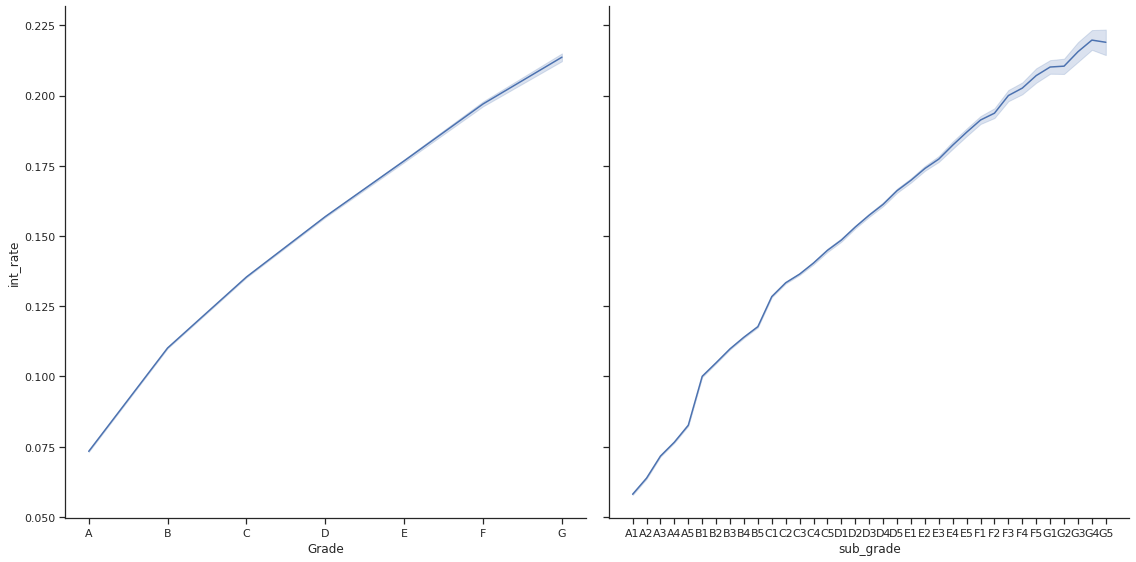

In [ ]:
import seaborn as sns

# Sort the data using the subgrades
loans_groupedbyGr = loans_Completed2.sort_values(by = ['sub_grade'])


# Plot interest rate against the grade and sub grade using seaborn
g = sns.PairGrid(loans_groupedbyGr, y_vars = ["int_rate"], x_vars = ["Grade", "sub_grade"], height =8)
g.map(sns.lineplot)



Evidently there is a linear relation between Grade, Sub-grade and int_rate... Therefore, dropping it isn't too much of an issue

In [ ]:
# Drop states, grade, sub-grade, loanstatus and pymnt_plan

loans_final = loans_Completed2.drop(['Grade','sub_grade','loan_status','pymnt_plan','addr_state'], axis = 1)

loans_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39223 non-null  int64  
 1   funded_amnt          39223 non-null  int64  
 2   int_rate             39223 non-null  float64
 3   term                 39223 non-null  object 
 4   installment          39223 non-null  float64
 5   emp_length           39223 non-null  object 
 6   home_ownership       39223 non-null  object 
 7   annual_inc           39223 non-null  float64
 8   verification_status  39223 non-null  object 
 9   purpose              39223 non-null  object 
 10  dti                  39223 non-null  float64
 11  delinq_2yrs          39223 non-null  object 
 12  fico_avg             39223 non-null  int64  
 13  inq_last_6mths       39223 non-null  object 
 14  open_acc             39223 non-null  int64  
 15  pub_rec              39223 non-null 

In [ ]:
# Since we are looking to predict whether a loan ends in profit/loss, remove payment details of loans

loans_predict = loans_final.drop(['total_pymnt','total_rec_prncp','total_rec_int','DiffPaid_Expected', 'revol_bal','revol_util','loan_amnt'], axis =1)

loans_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          39223 non-null  int64  
 1   int_rate             39223 non-null  float64
 2   term                 39223 non-null  object 
 3   installment          39223 non-null  float64
 4   emp_length           39223 non-null  object 
 5   home_ownership       39223 non-null  object 
 6   annual_inc           39223 non-null  float64
 7   verification_status  39223 non-null  object 
 8   purpose              39223 non-null  object 
 9   dti                  39223 non-null  float64
 10  delinq_2yrs          39223 non-null  object 
 11  fico_avg             39223 non-null  int64  
 12  inq_last_6mths       39223 non-null  object 
 13  open_acc             39223 non-null  int64  
 14  pub_rec              39223 non-null  object 
 15  total_acc            39223 non-null 

One hot encoding

In [ ]:
# Remove categorical variables from data and represent them as separate set of variables to allow for onehotencoding

loans_Cat2 = loans_predict.select_dtypes(include=['object'])

# Remove continuous variables from data to allow for normalization

loans_cont = loans_predict.select_dtypes(include=['int64','float64'])

In [ ]:
# For categorical data dummification

loans_dumm = pd.get_dummies(loans_Cat2)   
loans_dumm.head()  


,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unemployed,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_personal,purpose_small_business,delinq_2yrs_0,delinq_2yrs_1,delinq_2yrs_2,delinq_2yrs_3+,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,inq_last_6mths_4+,pub_rec_0,pub_rec_1,pub_rec_2+,Profit/Loss_Loss,Profit/Loss_Profit
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
# Identify variables with nearzerovariance or zero variance since they are technically of no use



variance = loans_dumm.var()                             # Find variance of variables
columns = loans_dumm.columns
variable = []
for i in range(0, len(variance)):
  if variance[i] < 0.01:                                # Identifyying variables with less than 1% variance
    variable.append(columns[i])



variable



['home_ownership_NONE', 'home_ownership_OTHER', 'delinq_2yrs_3+', 'pub_rec_2+']

In [ ]:

# Remove identified variables with low vairance

loans_dummVar = loans_dumm.drop(columns = variable)


In [ ]:
# To apply multiple functions to one set of data, a pipeline can be used

 # To use a pipeline ::::: from sklearn.pipeline import Pipeline
                         # from sklearn.preprocessing import StandardScaler
                         # num_pipeline = Pipeline([
                         # ('imputer', SimpleImputer(strategy="median")),
                         # ('attribs_adder', CombinedAttributesAdder()),
                         # ('std_scaler', StandardScaler()),
                         # ])                                                                  # In this case, first function is impute missing data with median, 
                                                                                               # then CombinedAttributesAdder followed by scalng of data

                         # housing_num_tr = num_pipeline.fit_transform(housing_num)             # Then, transform the data using the created pipeline



                  


# NB :: Difference between fit_transform() and transform() and fit()
#     fit()  will evaluate the desired factors from a dataset. For example, if we are scaling the data, it will calculate the variance and the mean of the data. Then the transform() function will scale the data using the mean and variance calculated. fit_transform() will performe both consectively. So,Following statistical standard for data standardization, the training data can be used on a fit() function to identify the mean and variance. Then, This information can be used to "transform()" or in this case scale the training and testing data based on variance and mean of training data


Code example:

# fit
normalizer = preprocessing.Normalizer().fit(xtrain)

#transform

xtrainnorm = normalizer.transform(xtrain)

xtestnorm = normalizer.transform(Xtest) 


In [ ]:
# Transformation of variables to be normally distributed

import numpy as np

loans_cont2 = loans_cont.copy()


for i in range(0, np.shape(loans_cont2)[1]):
  if loans_cont2.iloc[:,i].skew() >= 1 :
    colname = loans_cont2.columns[i]
    loans_cont2[colname] = np.log1p(loans_cont2.iloc[:,i])
    loans_cont2.columns.values[i] = 'log_' + colname


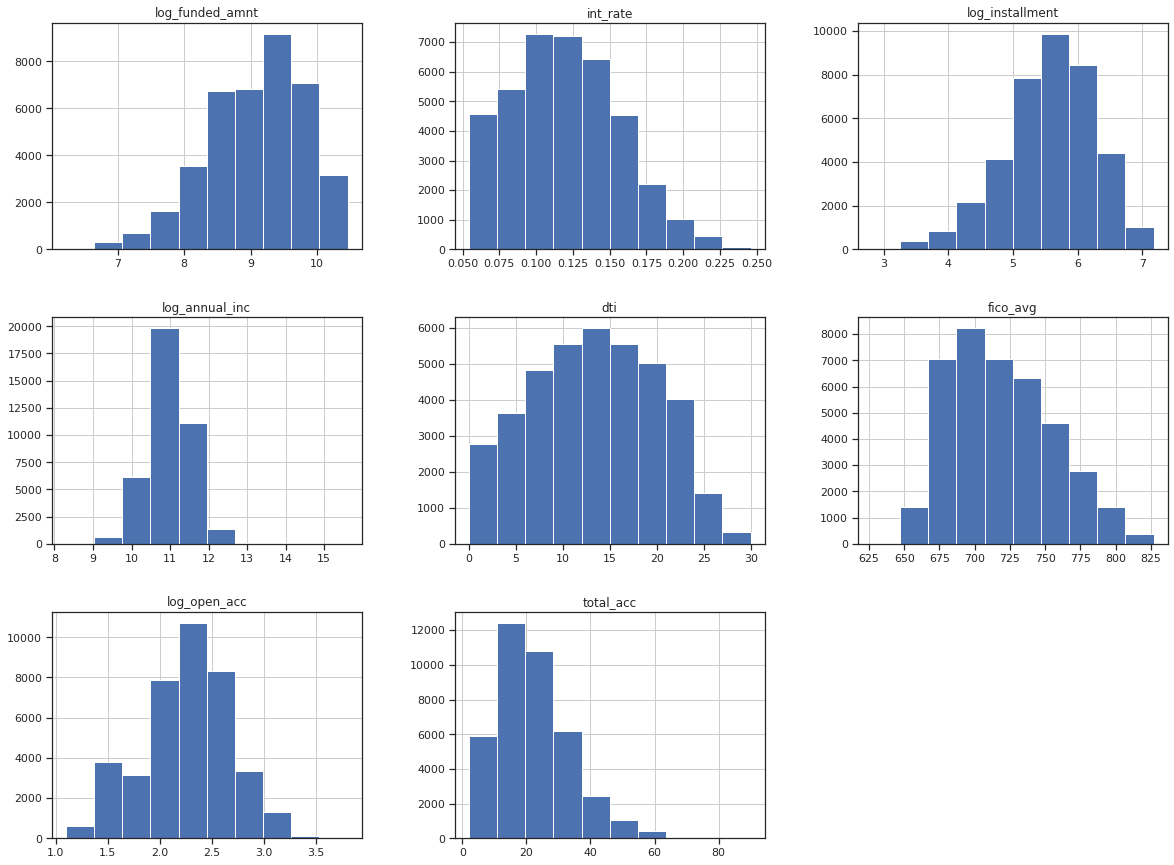

In [ ]:
# Check distribution of transformed variables

loans_cont2.hist(figsize = (20,15))
plt.show()


In [ ]:


# Then, perform Minmaxscaling on the continuous variables.

cont_attr = loans_cont2.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# transform the continuous data using minmaxscaling

loans_cont_scaled = pd.DataFrame(scaler.fit_transform(loans_cont2), columns = cont_attr)
loans_cont_scaled

,log_funded_amnt,int_rate,log_installment,log_annual_inc,dti,fico_avg,log_open_acc,total_acc
0,0.541805,0.272822,0.523906,0.244983,0.921974,0.550,0.106232,0.079545
1,0.378625,0.513824,0.296618,0.275495,0.033344,0.575,0.106232,0.022727
2,0.369016,0.549817,0.374242,0.153047,0.290764,0.550,0.000000,0.090909
3,0.705008,0.420970,0.691515,0.343140,0.666889,0.325,0.479785,0.397727
4,0.541805,0.129369,0.514755,0.300425,0.373458,0.525,0.444590,0.113636
...,...,...,...,...,...,...,...,...
39218,0.378625,0.138237,0.357780,0.453160,0.377793,0.675,0.568839,0.431818
39219,0.666741,0.253521,0.643791,0.205646,0.213404,0.325,0.312881,0.079545
39220,0.541805,0.138237,0.515308,0.440127,0.076692,0.575,0.511916,0.204545
39221,0.541805,0.104851,0.513176,0.534910,0.124041,0.925,0.661642,0.272727


All variables are scaled, grouped and ready for modelling

In [ ]:
# Concatenate continuous and categorical to prepare data for analysis

loans_analysis = pd.concat([loans_cont_scaled, loans_dummVar], axis = 1)

In [ ]:
# Examine proportion of classes in target variable

round(loans_analysis["Profit/Loss_Loss"].value_counts(normalize = True) * 100, 2)     



0.0    87.65
1.0    12.35
Name: Profit/Loss_Loss, dtype: float64

Highly imbalanced dataset. So, to overcome this, two methods will be examined --- Oversampling and undersampling

In [ ]:
# First, oversampling using SMOTE

import  imblearn

oversample = SMOTE(random_state = 124, ratio = 1.0)






/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

